<a href="https://colab.research.google.com/github/abhirbhandary/Python/blob/main/Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.&nbsp;Import libraries and files 💾

In [ ]:
import pandas as pd


In [ ]:
# Movies
url = "https://drive.google.com/file/d/1Ehe4rSQgFqZTioDmWT3gb0bmlVGByLkb/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
Movies = pd.read_csv(path)

# links
url = "https://drive.google.com/file/d/1ZFWHUL0eVtyTnGzUTD65VO3r_5Llau7p/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
links = pd.read_csv(path)

# tags
url = "https://drive.google.com/file/d/1wR2eVSyTNX80wvIqmYwWYE1v30woNNSj/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
tags = pd.read_csv(path)

# ratings
url = "https://drive.google.com/file/d/1E9h8UowaRrSfYP9lkV1H2atm_gdL4Hq7/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
ratings = pd.read_csv(path)

##2.&nbsp;Explore the data 👩‍🚀

In [ ]:
Movies.info()

In [ ]:
Movies["genres"]

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings["userId"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
ratings.head()

In [ ]:
tags.info()

In [ ]:
tags.head()

In [ ]:
tags["tag"].unique()

In [ ]:
tags[tags["tag"] == "popular"]

In [ ]:
links.info()

##3.&nbsp;Popularity recommender

###3.1.&nbsp;Higest Rated Movies

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Let's the look at the most popular Movie by average rating

In [ ]:
rating_count_df = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
rating_count_df.nlargest(5, ['mean', 'count'])

,movieId,mean,count
48,53,5.0,2
87,99,5.0,2
869,1151,5.0,2
2593,3473,5.0,2
4384,6442,5.0,2


Movie with the highest mean score

In [ ]:
highest_rating_isbn = rating_count_df.nlargest(1, 'mean')['movieId'].values[0]

highest_rated_movieId_mask = Movies['movieId'] == highest_rating_isbn
movie_info_columns = ['title', 'genres']

Movies.loc[highest_rated_movieId_mask, movie_info_columns].drop_duplicates()

,title,genres
48,Lamerica (1994),Adventure|Drama


###3.2.&nbsp;Most rated Movie
But are the most highly rated movie also the most seen movie?

In [ ]:
rating_count_df.sort_values(by=['count', 'mean'], ascending=False).head()

,movieId,mean,count
314,356,4.164134,329
277,318,4.429022,317
257,296,4.197068,307
510,593,4.161290,279
1938,2571,4.192446,278


In [ ]:
most_rated_movie = rating_count_df.nlargest(1, 'count')['movieId'].values[0]
most_rated_movie_mask = Movies['movieId'] == most_rated_movie

Movies.loc[most_rated_movie_mask, movie_info_columns].drop_duplicates()

,title,genres
314,Forrest Gump (1994),Comedy|Drama|Romance|War


Looks like some movie are well loved and some movies are seen a lot, we'll need to strike a balance of the two to find out the overall top 10 most popular movies.

###3.3.&nbsp;Higest Rated Movies

hybrid system to sort movies, so that you can recommend the "best" movie that are both high rated and popular.

In [ ]:
# Scale 'count' from 1-5 to 'scaled_count'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 5))
rating_count_df['scaled_count'] = scaler.fit_transform(rating_count_df[['count']])
rating_count_df

In [ ]:
rating_count_df['rank'] = (rating_count_df['mean'])+rating_count_df['scaled_count']

In [ ]:
rating_count_df

In [ ]:
rating_count_df.sort_values('rank', ascending=False).head(10)

In [ ]:
# Top Popular Movie
most_rated_movie = rating_count_df.nlargest(1, 'rank')['movieId'].values[0]
most_rated_movie_mask = Movies['movieId'] == most_rated_movie

Movies.loc[most_rated_movie_mask, movie_info_columns].drop_duplicates()

,title,genres
277,"Shawshank Redemption, The (1994)",Crime|Drama


In [ ]:
most_rated_movie

In [ ]:
# 10 Top Popular Movie
(
rating_count_df
.drop_duplicates(subset='movieId')
.merge(Movies.drop_duplicates(subset='movieId'),
       on='movieId',
       how='left')
[movie_info_columns + ["mean", "count", "rank"]]
.nlargest(10, 'rank')
)

,title,genres,mean,count,rank
277,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317,9.282681
314,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329,9.164134
257,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307,8.928776
1938,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278,8.570495
510,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279,8.551534
224,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251,8.279856
2224,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218,7.919277
97,Braveheart (1995),Action|Drama|War,4.031646,237,7.909694
461,Schindler's List (1993),Drama|War,4.225000,220,7.895732
897,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.215640,211,7.776615


##4.&nbsp;Item based recommender

1. Two movies will be declared similar if they were given a high (or low) rating by the same users.

2. In our movies database, we could have a romantic drama and an action comedy with completely different casts produced in different continents… and yet, if they were rated highly / lowly by the same sets of users, we will consider them similar movies.

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


###4.1&nbsp;User-Item matrix 💻

This matrix serves as a fundamental component for storing and examining the interactions between users and items, enabling us to uncover similarities and make predictions. The user-item matrix acts as a representation of the ratings or preferences expressed by users for each item within the system.

In [ ]:
user_movie_matrix = pd.pivot_table(data=ratings,
                                  values='rating',
                                  index='userId',
                                  columns='movieId',
                                  fill_value=0)
user_movie_matrix.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
6,0.0,4.0,5.0,3.0,5.0,4.0,4.0,3,0.0,3.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


There are three main methods of calculating similarities in recommender systems: Jaccard, Pearson, and Cosine. Which one you use depends on the type of data you are dealing with.

###4.2.&nbsp;Pearson correlation matrix
The Pearson correlation coefficient (PCC) measures the linear relationship between two sets of data. It takes values between -1 and 1, where -1 indicates a perfect negative correlation, 1 represents a perfect positive correlation, and 0 signifies no correlation at all.

In pandas, the `.corr()` method is employed to calculate the pairwise correlation among columns in a DataFrame, excluding any NaN (missing) values. This method generates a correlation matrix.

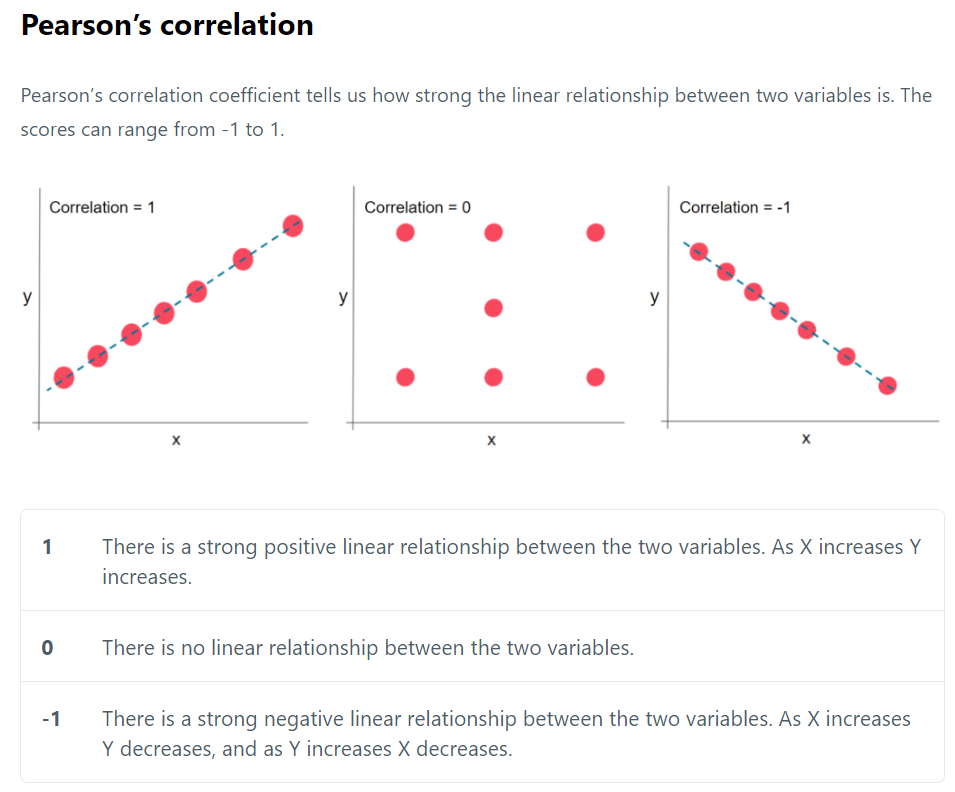

In [ ]:
movie_correlations_matrix = user_movie_matrix.corr()
movie_correlations_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.231327,0.173213,-0.028917,0.192474,0.192686,0.143743,0.085477,0.177245,0.183382,...,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906
2,0.231327,1.000000,0.191945,0.071269,0.200526,0.158341,0.127569,0.141540,-0.021045,0.285086,...,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291
3,0.173213,0.191945,1.000000,0.067143,0.370171,0.196442,0.351513,0.296897,0.275812,0.136916,...,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729
4,-0.028917,0.071269,0.067143,1.000000,0.167910,0.053755,0.258075,0.148726,-0.016025,0.056000,...,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138
5,0.192474,0.200526,0.370171,0.167910,1.000000,0.215503,0.429890,0.265777,0.308085,0.110833,...,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642
193583,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642
193585,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642


####4.2.1.&nbsp;Finding movie similar to the most popular movie - Shawshank Redemption
Create a DataFrame of how correlated other movies are to Shawshank Redemption

In [ ]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
# Find the movieId for The Shawshank Redemption
Shawshank_title_mask = Movies["title"].str.contains('Shawshank Redemption', case=False)
Shawshank_movieId = Movies.loc[Shawshank_title_mask, "movieId"].values[0]

In [ ]:
Shawshank_movieId

318

In [ ]:
# Select the column, from the above matrix, matching the movieId of Shawshank Redemption to see the coreleation
movie_correlations_matrix_df = pd.DataFrame(movie_correlations_matrix[Shawshank_movieId])
movie_correlations_matrix_df.head()

,318
movieId,
1,0.166503
2,0.130350
3,0.030163
4,0.087926
5,0.039778


Let's have a deeper dig and see how many people rated both Shawshank Redemption and the movie being compared to see how many ratings influenced the correlation coefficient. We're doing this just to check that a good correlation didn't come from only 2 reviews. As if only two people have scored two movies 5/5, then it is easy for these books to have a very strong correlation, but this figure may be misleading - remember the law of large numbers?

In [ ]:
no_of_users_rated_both_movie = [sum((user_movie_matrix[Shawshank_movieId] > 0) & (user_movie_matrix[movieId] > 0)) for movieId in movie_correlations_matrix_df.index]

movie_correlations_matrix_df['users_who_rated_both_movies'] = no_of_users_rated_both_movie

movie_correlations_matrix_df.head(10)

,318,users_who_rated_both_books,users_who_rated_both_movies
movieId,,,
1,0.166503,137,137
2,0.130350,73,73
3,0.030163,28,28
4,0.087926,7,7
5,0.039778,26,26
6,0.162584,71,71
7,0.019471,29,29
8,0.067410,6,6
9,-0.036730,6,6


Let's have a look at the distribution of no_of_users_rated_both_movie to see if there are any extremely low values

In [ ]:
movie_correlations_matrix_df['users_who_rated_both_movies'].hist(bins=20);

In [ ]:
movie_correlations_matrix_df = movie_correlations_matrix_df[movie_correlations_matrix_df["users_who_rated_both_movies"] > 10]

In [ ]:
movie_correlations_matrix_df.head()

Let's add the titles to see what our results are

In [ ]:
Movies.info()

In [ ]:
movie_info_columns = ['movieId', 'title', 'genres']

Shawshank_top_10_correlation = (movie_correlations_matrix_df
                                  .head(10)
                                  .reset_index()
                                  .merge(Movies.drop_duplicates(subset='movieId'),
                                         on='movieId',
                                         how='left')
                                  [movie_info_columns + [318,	'users_who_rated_both_movies']]
                                  )
Shawshank_top_10_correlation

###4.3.&nbsp;Cosine similarity correlation matrix
Cosine similarity determines the similarity between two vectors in a multi-dimensional space. It quantifies the cosine of the angle between the vectors, providing a value between -1 and 1.

Unlike the Pearson correlation coefficient, which measures the linear relationship between two sets of data, cosine similarity focuses on the direction rather than the magnitude of the vectors. A cosine similarity value of 1 indicates that the vectors are perfectly aligned, while a value of -1 suggests they are completely opposite in orientation. A value of 0 implies no similarity between the vectors.

In the context of data analysis using pandas, cosine similarity is not calculated directly through a specific method like the `.corr()` method for Pearson correlation. Instead, it is commonly computed using mathematical formulas or specific libraries, here we use our old friend SKLearn.

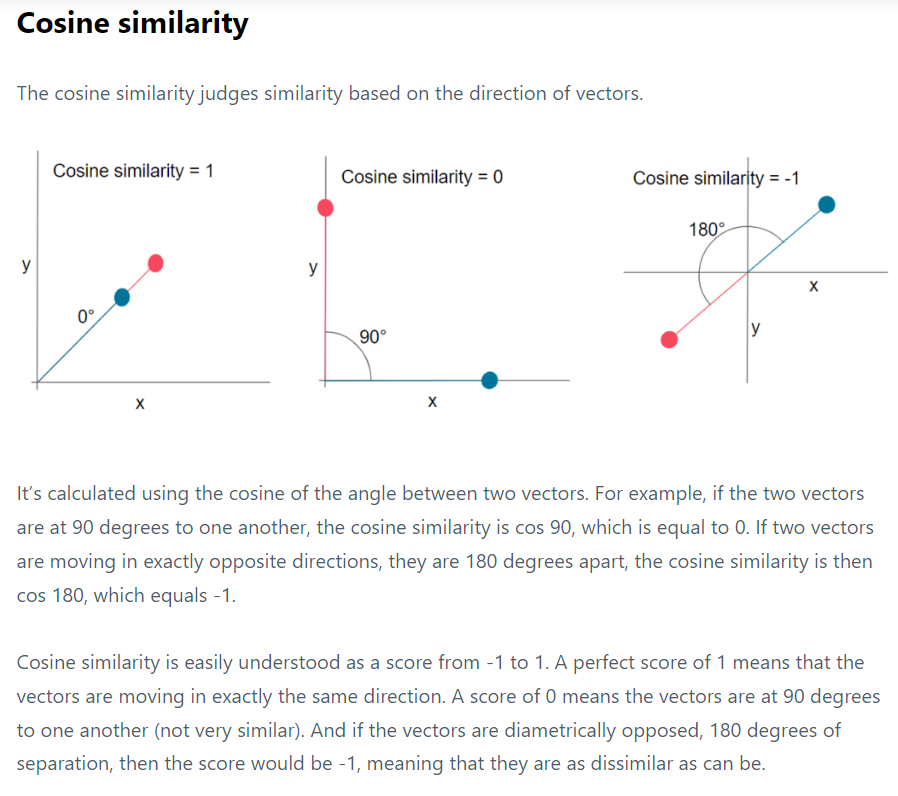

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# T for transpose
Movie_cosines_matrix = pd.DataFrame(cosine_similarity(user_movie_matrix.T),
                                    columns=user_movie_matrix.columns,
                                    index=user_movie_matrix.columns)
Movie_cosines_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
193583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
193585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


####4.3.1.&nbsp;Finding Movie similar to the most popular Movie- Shawshank Redemption
This process is virtually the same as we did for correlation comparison above

In [ ]:
# Create a DataFrame using the values from 'Movie_cosines_matrix' for the 'Shawshank_movieId' book.
Shawshank_movieId_cosines_df = pd.DataFrame(Movie_cosines_matrix[Shawshank_movieId])

In [ ]:
Shawshank_movieId_cosines_df

,Shawshank_cosine
movieId,
356,0.712993
296,0.702366
593,0.647066
50,0.631787
527,0.629145
...,...
96608,0.000000
96530,0.000000
2566,0.000000


In [ ]:
# Rename the column
Shawshank_movieId_cosines_df = Shawshank_movieId_cosines_df.rename(columns={318: 'Shawshank_cosine'})

In [ ]:
# Remove the row with the index 318
Shawshank_movieId_cosines_df = Shawshank_movieId_cosines_df[Shawshank_movieId_cosines_df.index != 318]

In [ ]:
# Sort the in descending order.
Shawshank_movieId_cosines_df = Shawshank_movieId_cosines_df.sort_values(by="Shawshank_cosine", ascending=False)

In [ ]:
# Find out the number of users rated both Shawshank and the other movies
no_of_users_rated_both_movie = [sum((user_movie_matrix[Shawshank_movieId] > 0) & (user_movie_matrix[movieId] > 0)) for movieId in Shawshank_movieId_cosines_df.index]

In [ ]:
# Create a column for the number of users who rated both
Shawshank_movieId_cosines_df['users_who_rated_both_movies'] = no_of_users_rated_both_movie

In [ ]:
# Remove recommelovely_bones_cosines_dfndations that have less than 10 users who rated both.
Shawshank_movieId_cosines_df = Shawshank_movieId_cosines_df[Shawshank_movieId_cosines_df["users_who_rated_both_movies"] > 10]

In [ ]:
# Display the first 10 rows of the DataFrame.
Shawshank_movieId_cosines_df.head(10)

,Shawshank_cosine,users_who_rated_both_movies
movieId,,
356,0.712993,231
296,0.702366,222
593,0.647066,199
50,0.631787,163
527,0.629145,165
2959,0.606644,162
110,0.597317,167
2571,0.589155,181
150,0.578835,151


Add the titles to the top 10

In [ ]:
movie_info_columns = ['movieId', 'title', 'genres']

Shawshank_top_10_cosine = (Shawshank_movieId_cosines_df
                                  .head(10)
                                  .reset_index()
                                  .merge(Movies.drop_duplicates(subset='movieId'),
                                         on='movieId',
                                         how='left')
                                  [movie_info_columns + ['Shawshank_cosine',	'users_who_rated_both_movies']]
                                  )
Shawshank_top_10_cosine

,movieId,title,genres,Shawshank_cosine,users_who_rated_both_movies
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,0.712993,231
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0.702366,222
2,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0.647066,199
3,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.631787,163
4,527,Schindler's List (1993),Drama|War,0.629145,165
5,2959,Fight Club (1999),Action|Crime|Drama|Thriller,0.606644,162
6,110,Braveheart (1995),Action|Drama|War,0.597317,167
7,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,0.589155,181
8,150,Apollo 13 (1995),Adventure|Drama|IMAX,0.578835,151
9,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.564136,149


##5.&nbsp;Challenge: build a function 😃

In [ ]:
def popularity_based_recommender(n):
  rating_count_df = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler(feature_range=(1, 5))
  rating_count_df['scaled_count'] = scaler.fit_transform(rating_count_df[['count']])
  rating_count_df['rank'] = (rating_count_df['mean'])+rating_count_df['scaled_count']

  df= (
   rating_count_df
   .drop_duplicates(subset='movieId')
   .merge(Movies.drop_duplicates(subset='movieId'),
       on='movieId',
       how='left')
    [movie_info_columns + ["mean", "count", "rank"]]
    .nlargest(10, 'rank')
     )
  return df.head(n)

In [ ]:
popularity_based_recommender(10)

,movieId,title,genres,mean,count,rank
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317,9.282681
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329,9.164134
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307,8.928776
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278,8.570495
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279,8.551534
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251,8.279856
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218,7.919277
97,110,Braveheart (1995),Action|Drama|War,4.031646,237,7.909694
461,527,Schindler's List (1993),Drama|War,4.225000,220,7.895732
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.215640,211,7.776615


##6.&nbsp;Implement a chatbot

In [ ]:
def popularity_based_recommender(n):
  rating_count_df = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler(feature_range=(1, 5))
  rating_count_df['scaled_count'] = scaler.fit_transform(rating_count_df[['count']])
  rating_count_df['rank'] = (rating_count_df['mean'])+rating_count_df['scaled_count']

  df= (
   rating_count_df
   .drop_duplicates(subset='movieId')
   .merge(Movies.drop_duplicates(subset='movieId'),
       on='movieId',
       how='left')
    [movie_info_columns + ["mean", "count", "rank"]]
    .nlargest(10, 'rank')
     )

  return df.head(10)

In [ ]:
def chat_bot():
    print("Hi! I'm your personal recommender.")
    genre = int(input("choose your genre, 1 = Comedy 2= Drama  3= Thriller"))
    print("you have chosen", genre)
    df = popularity_based_recommender(10)
    if genre == 1:
      a = df[df["genres"].str.contains("Comedy")]
      print((a['title']).to_string(index=False))
    elif genre == 2:
      a = df[df["genres"].str.contains("Drama")]
      print((a['title']).to_string(index=False))
    elif genre == 3:
      a = df[df["genres"].str.contains("Thriller")]
      print((a['title']).to_string(index=False))
    else:
      print((a['title']).to_string(index=False))

In [ ]:
chat_bot()

Hi! I'm your personal recommender.
choose your genre, 1 = Comedy 2= Drama  3= Thriller2
you have chosen 2
Shawshank Redemption, The (1994)
             Forrest Gump (1994)
             Pulp Fiction (1994)
               Fight Club (1999)
               Braveheart (1995)
         Schindler's List (1993)


##7.&nbsp;User based recommender

#### 7.1 Create the similarity matrix

In 3 simple steps:

1. Create the users-movie table

2. Replace NaNs with zeros

3. Compute pairwise cosine similarities




1. Create the users-movie table table.

We are just reshaping (pivoting) the data, so that we have users as rows and movieId as columns. We need the data to be in this shape to compute similarities between users in the next step.`

In [ ]:
user_movie_matrix = pd.pivot_table(data=ratings,
                                  values='rating',
                                  index='userId',
                                  columns='movieId',
                                  fill_value=0)
user_movie_matrix.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
6,0.0,4.0,5.0,3.0,5.0,4.0,4.0,3,0.0,3.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


2. Replace NaNs with zeros
The cosine similarity can't be computed with NaN's

In [ ]:
# no NaN's found
user_movie_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 9724 entries, 1 to 193609
dtypes: float64(6510), int64(3214)
memory usage: 45.3 MB


3. Compute cosine similarities

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
Movie_cosines_matrix = pd.DataFrame(cosine_similarity(user_movie_matrix),
                                    columns=user_movie_matrix.index,
                                    index=user_movie_matrix.index)
Movie_cosines_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


#### 7.2 Building the recommender step by step:

Let's focus on one random user (user `1`) and compute the recommendations only for this user, as an example. Then, we will build a function that can compute recommendations for any users. We will follow these steps:

1. Compute the weights.

2. Find movie user `1` has not rated.

3. Compute the ratings user `1` would give to those unrated movies.

4. Find the top 5 movies from the rating predictions.

1. Compute the weights
Here we will exclude user 1 using .query().

Example to compute weights

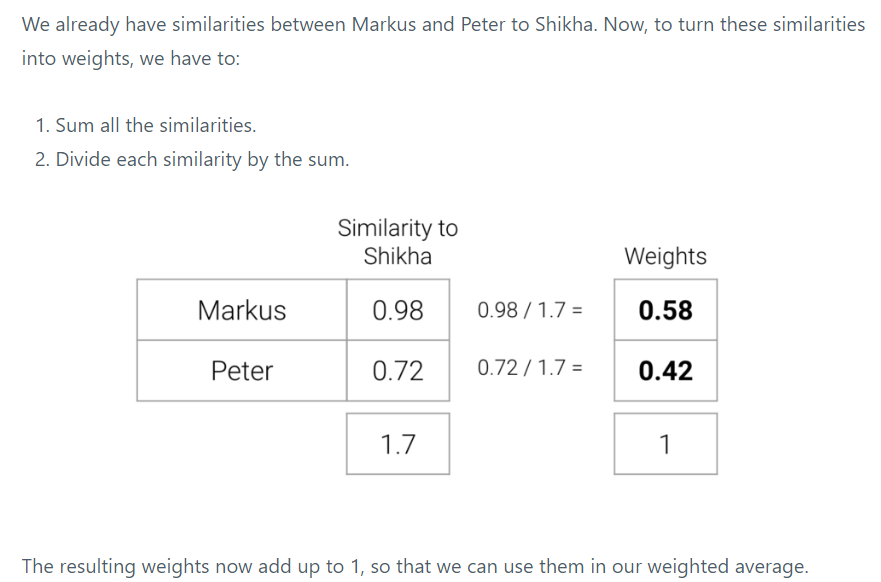

In [ ]:
# compute the weights for one user
user_id = 1

weights = (
    Movie_cosines_matrix.query("userId!=@user_id")[user_id] / sum(Movie_cosines_matrix.query("userId!=@user_id")[user_id])
          )
weights.head(6)

userId
2    0.000336
3    0.000736
4    0.002395
5    0.001590
6    0.001579
7    0.001956
Name: 1, dtype: float64

In [ ]:
weights.sum()

1.000000000000001

#### 7.3 Find movies user 1 has not rated.

We will exclude our user, since we don't want to include them on the weights.

In [ ]:
# select restaurants that the inputed user has not visited
not_seen_restaurants = user_movie_matrix.loc[user_movie_matrix.index!=user_id, user_movie_matrix.loc[user_id,:]==0]
not_seen_restaurants.T

#### 7.4 Compute the ratings user 1 would give to those unrated restaurants.

In [ ]:
# dot product between the not-visited-restaurants and the weights
weighted_averages = pd.DataFrame(not_seen_restaurants.T.dot(weights), columns=["predicted_rating"])
weighted_averages.head()

,predicted_rating
movieId,
2,0.842127
4,0.027652
5,0.275115
7,0.321403
8,0.046876


#### 7.5 Find the top 5 movies from the rating predictions

In [ ]:
recommendations = weighted_averages.merge(Movies, left_index=True, right_on="movieId")
recommendations.sort_values("predicted_rating", ascending=False).head()

,predicted_rating,movieId,title,genres
277,2.654727,318,"Shawshank Redemption, The (1994)",Crime|Drama
507,2.087327,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi
659,1.859548,858,"Godfather, The (1972)",Crime|Drama
2078,1.663564,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery
3638,1.624820,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
